#### Neural Network




##### RELU 
Rectified Linear Unit 

sigmoid function is no longer used as it is slow for the neural network to learn 
hence RELU is used which is less than 0 is inactive and greater than 0 is activated


Structured data represents a database or table of data 
unstructured data represents raw audio, text or images. 

Given the large amount of data large neural nets are able to give better performance compared to classical machine learning algorithms.  


Binary Classification 





Logistic regression


$ \hat{y} = \sigma(w^Tx + b) , \sigma(z) = \frac{1}{1 + e^{-z}}$

$ L(y,\hat{y}) = - (ylog\hat{y}+(1-y)log(1-\hat{y})$

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np

ANN 

introduced in 1943 by neurophysiologist and mathematician. 
success of ANN's 
    
    1.Data Abundance
    2.Increase in the Compuatation power. 
    3.Training algorithms have improved with slight tweaks which made a huge impact. 
    4.Theoritical limitations of ANN's have turned out to be benign in practice. 
    
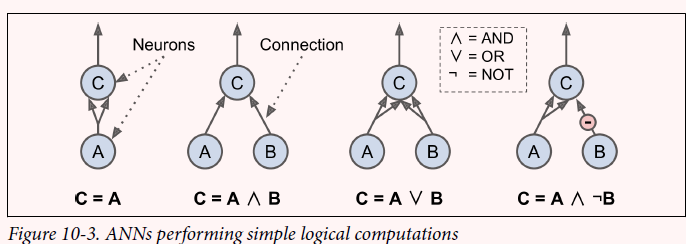
Perceptron is the simplest ANN architectures inved in 1957 by Frank rosenblatt. 
based on a different artificial neuron called threshold logic unit (TLU). sometimes called a linear threshold unit. (LTU). 

TLU 
**Inputs** are now numbers with each input connection is associated with a **weight**. 
TLU computes the **weighted sum** of its inputs ($z = w_1x_1 + w_2x_2...+w_nx_n = X^Tw)$
a **step function** to that sum is applied and **outputs** the result 

Most common step function used in perceptrons **heaviside function and heaviside step function**

Perceptron is simply composed of a single layer of the TLU. 
when all the neurons in a layer are connected to everfy neuron in the previous layer it is called a fully connected layer or a dense layer. 


Bias Neuron is a special type of neuron which always outputs 1.

Computing the output of the fully connected layer. 
$h_{w,b}(X) = \phi(XW + b)$

Perceptron takes into account the error made by the network and it reinforces connections that help reduce the error. 

Perceptron learning rule: 
$ w_{i,j}^{(\text{next step})} = w_{i,j} + \eta(y_j-\hat{y}_j)x_i$


Perceptrons do not output a class probablity, rather they make predictions based on a hard threshold. one reason to prefer logistic regression. 

Autodiff  -> Automatic differentiation 
**Backpropagation** - is an algorithm used to find the gradient of the network's error with regards to every single model parameter.

1) algorithm makes mini batch at a time and goes through the full training set in a Epoch
2) (forward pass) Each mini batch is passed into the network input layer,
    then sent to the first hidden layer, 
    algorithm computes the output for each instance in the mini batch and passed to the next,
    the process goes on till the output layer. 
    At each intermediate layer the results are preserved.
3) The algorithm computes how much each output connection contributed to the error. (by applying the chain rule) 
4) The algorithm then measures how much these errors contributions came from each node in the previous layer using chain rule and recurse the same until it reaches the input layer.
Reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network. 

If the desired output is between -1 and 1 or 0 to 1, an activation function can be added so that it the values are restricted.  

Softmax function can be used to as an activation function at the output node to get the probablities. 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'1.14.0'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape,y_train_full.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [8]:
fashion_mnist

<module 'tensorflow.python.keras.api._v1.keras.datasets.fashion_mnist' from 'C:\\Users\\bhara\\Anaconda3\\lib\\site-packages\\tensorflow\\python\\keras\\api\\_v1\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

In [10]:
class_names[y_train[5]]

'Ankle boot'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


W0915 14:58:30.878830 16708 deprecation.py:506] From C:\Users\bhara\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [14]:
784 * 300 + 300

235500

In [15]:
model.layers[2].name

'dense_1'

In [16]:
weights, biases = model.layers[1].get_weights()

In [17]:
weights.shape,biases.shape

((784, 300), (300,))

In [18]:
weights[:10]

array([[-0.02607135,  0.06141526, -0.00354787, ..., -0.03904687,
         0.05337292, -0.05967566],
       [ 0.02382825,  0.0065911 ,  0.00840627, ..., -0.050955  ,
        -0.06308524, -0.0485636 ],
       [-0.02485488,  0.06114112,  0.05846162, ...,  0.00273012,
        -0.00404113,  0.05533944],
       ...,
       [ 0.04969909,  0.06379862,  0.06379355, ..., -0.03998696,
        -0.01903628,  0.06056996],
       [-0.03367936, -0.02019887,  0.0259094 , ...,  0.02771214,
        -0.03069018, -0.07355145],
       [-0.02964973,  0.03166012,  0.05957368, ..., -0.00514694,
        -0.02920481, -0.01792999]], dtype=float32)

In [19]:
np.unique(biases,return_counts=True)

(array([0.], dtype=float32), array([300], dtype=int64))

Weights are randomly initialized in order to break the symmetry. Biases are initialized as zeros 
we can also use kernel_initializer (kernal is another name for the matrix of connection weights) or bias_initializer when creating the layer. 

Its better to specify the shape of the input matrix when creating the mode.If the matrix is not specified Keras will wait till training when the input data is fed into the model or when build() method is called. Until the models is build the layers will not have any weights and the model.Summary() command will not work. 

Now the model is created. we need to use the compile() method

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

here we need to predict the class of 0 to 9 values for each of the fashion categories. Hence we need to use a categorical crossentropy and the loss function used here is softmax.  If we had binary classifier then we would use a sigmoid activation function for the output and the loss would be binary crossentropy.

In [21]:
model.fit(X_train,y_train,epochs=15,verbose=1,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 4s 74us/sample - loss: 0.7293 - acc: 0.7603 - val_loss: 0.5339 - val_acc: 0.8192
Epoch 2/15
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4912 - acc: 0.8304 - val_loss: 0.4472 - val_acc: 0.8490
Epoch 3/15
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4437 - acc: 0.8462 - val_loss: 0.4580 - val_acc: 0.8452
Epoch 4/15
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4165 - acc: 0.8553 - val_loss: 0.3978 - val_acc: 0.8628
Epoch 5/15
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3947 - acc: 0.8624 - val_loss: 0.3902 - val_acc: 0.8684
Epoch 6/15
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3788 - acc: 0.8670 - val_loss: 0.3718 - val_acc: 0.8710
Epoch 7/15
55000/55000 [==============================] - 4s 72us/sample - loss: 0.3667 - acc: 0.8699 - val_loss: 0.3

In [22]:
model.history.history

{'loss': [0.7292617670405995,
  0.4912304305336692,
  0.4437171644644304,
  0.4164554618965496,
  0.3947149205684662,
  0.3787703648198735,
  0.36672947447733445,
  0.35424116498990493,
  0.34460736843239176,
  0.3345050432226875,
  0.3269147240346128,
  0.318671140349995,
  0.3104037612459876,
  0.30392387811270627,
  0.2978564454642209],
 'acc': [0.76034546,
  0.83043635,
  0.8461818,
  0.8552909,
  0.86243635,
  0.8669636,
  0.86994547,
  0.87494546,
  0.8796545,
  0.88103634,
  0.8844,
  0.88623637,
  0.8882,
  0.8910546,
  0.89370906],
 'val_loss': [0.5339168300151825,
  0.44718486247062683,
  0.45797713661193845,
  0.39775794118642804,
  0.390187704372406,
  0.3717873414993286,
  0.3794272110819817,
  0.35641005749702453,
  0.34436704773902893,
  0.347067711019516,
  0.35337891154289247,
  0.3329256856918335,
  0.33631121629476546,
  0.3218248595714569,
  0.32318235118389127],
 'val_acc': [0.8192,
  0.849,
  0.8452,
  0.8628,
  0.8684,
  0.871,
  0.8684,
  0.8792,
  0.8802,
  0.8

In [23]:
import pandas as pd

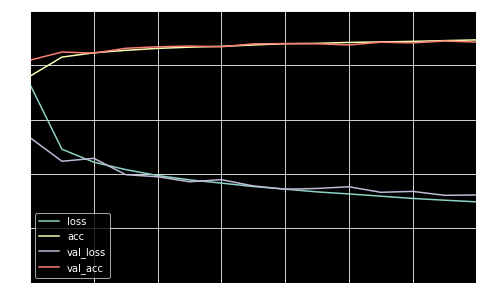

In [24]:
pd.DataFrame(model.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [25]:
x_new = X_test[:5]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [28]:
y_new = y_test[:5]
np.array(class_names)[y_new] 

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

Building a Regression MLP using the Sequential API 

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full,shuffle=True,random_state=46)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer='sgd')
history = model.fit(X_train_scaled,y_train,epochs=30,validation_data=(X_valid_scaled,y_valid))
mse_test = model.evaluate(X_test_scaled,y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 120us/sample - loss: 1.0924 - val_loss: 0.5376
Epoch 2/30
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5231 - val_loss: 0.4858
Epoch 3/30
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4895 - val_loss: 0.4601
Epoch 4/30
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4628 - val_loss: 0.4416
Epoch 5/30
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4528 - val_loss: 0.4335
Epoch 6/30
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4435 - val_loss: 0.4280
Epoch 7/30
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4422 - val_loss: 0.4166
Epoch 8/30
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4277 - val_loss: 0.4121
Epoch 9/30
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4185 - val_

Keras functional API can provide customizable API's for multiple inputs and outputs
regular MLP forces all the data to go through the full stack of the layers. Simple patterns in the data may get distorted by this sequence of transformations. 



In [54]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input],outputs=[output])


In [63]:
input1 = keras.layers.Input(shape=[5])
input2 = keras.layers.Input(shape=[5])
hidden1 = keras.layers.Dense(30,activation='relu')(input1)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input2,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input1,input2],outputs=[output])

In [64]:
model.compile(loss='mse',optimizer='RMSprop')
X_train_A,X_train_B = X_train[:,:5],X_train[:,3:]
X_valid_A,X_valid_B = X_valid[:,:5],X_valid[:,3:]
X_test_A,X_test_B = X_test[:,:5],X_test[:,3:]
X_new_A,X_new_B = X_test_A[:3],X_test_B[:3]

In [75]:
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,
                    validation_data=((X_valid_A,X_valid_B),y_valid))
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 120us/sample - loss: 5.9369 - val_loss: 0.7915
Epoch 2/20
11610/11610 [==============================] - 1s 94us/sample - loss: 5.8663 - val_loss: 0.9573
Epoch 3/20
11610/11610 [==============================] - 1s 93us/sample - loss: 6.1527 - val_loss: 28.9650
Epoch 4/20
11610/11610 [==============================] - 1s 93us/sample - loss: 6.4322 - val_loss: 7.8438
Epoch 5/20
11610/11610 [==============================] - 1s 93us/sample - loss: 6.1703 - val_loss: 1.3458loss: 6.24
Epoch 6/20
11610/11610 [==============================] - 1s 92us/sample - loss: 5.8699 - val_loss: 0.7856
Epoch 7/20
11610/11610 [==============================] - 1s 99us/sample - loss: 5.4746 - val_loss: 0.7227
Epoch 8/20
11610/11610 [==============================] - 1s 91us/sample - loss: 5.5499 - val_loss: 5.4759
Epoch 9/20
11610/11610 [==============================] - 1s 90us/sample - loss: 5.

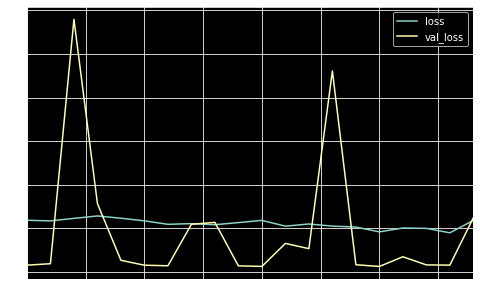

In [76]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
# plt.gca().set_ylim(0,10)
plt.show()

In [74]:
housing.data,housing.target

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [78]:
y_pred

(7.08085522245067, array([[2.7852285],
        [3.2394068],
        [4.47383  ]], dtype=float32))

In [79]:
y_test[:3]

array([0.891, 1.137, 2.683])